# FCNN Linear Data Classification

In [70]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [71]:
file1path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class1.txt"
file2path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class2.txt"
file3path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class3.txt"

In [72]:
def readdata(file1path, file2path, file3path):
    
    class1 = pd.read_csv(file1path, header=None, delimiter=" ")
    class2 = pd.read_csv(file2path, header=None, delimiter=" ")
    class3 = pd.read_csv(file3path, header=None, delimiter=" ")
    
    return class1, class2, class3

In [73]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [74]:
def plotplots(class1, class2, class3):
    
    plt.scatter(class1[0], class1[1])
    plt.scatter(class2[0], class2[1])
    plt.scatter(class3[0], class3[1])
    plt.legend(['Class 1','Class 2','Class 3'])
    plt.title("Input Data")
    plt.show()

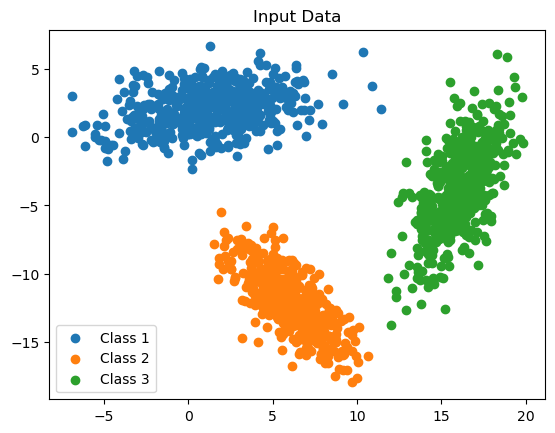

In [77]:
class1, class2, class3 = readdata(file1path, file2path, file3path)
plotplots(class1, class2, class3)

training1, validation1, test1 = split_data(class1)
training2, validation2, test2 = split_data(class2)
training3, validation3, test3 = split_data(class3)

tr1, tr2, tr3 = len(training1), len(training2), len(training3)
v1, v2, v3 = len(validation1), len(validation2), len(validation3)
t1, t2, t3 = len(test1), len(test2), len(test3)

In [78]:
training = training1.append(training2, ignore_index=True)
training = training.append(training3, ignore_index=True)

validation = validation1.append(validation2, ignore_index=True)
validation = validation.append(validation3, ignore_index=True)

test = test1.append(test2, ignore_index=True)
test = test.append(test3, ignore_index=True)

# FCNN Model

In [91]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

def inst_error(y, yp):
    return sum(0.5*(y-yp)**2)

In [176]:
def train_data(xn, l1, l2):

    wh = 0.10*np.random.randn(3, 32)
    wo = 0.10*np.random.randn(32, 3)
    avg_err = []
    epoch = 1000
    
    while(epoch):
    
        err = []
        c1, c2, c3 = 0, 0, 0
        
        for i in range(len(xn)):

            xi = [1, xn.iat[i,0], xn.iat[i,1]] #Input layer
            #--------------------------
            h1 = np.dot(wh.T, xi) #hidden layer 1 out
            a1 = sigmoid(h1) #hidden layer 1 activation out
            #--------------------------
            out = np.dot(wo.T, a1) #Output layer out
            ao = sigmoid(out) #Output activation 
            #--------------------------

            if i<l1:
                y = [1, 0, 0]
                en = inst_error(y, ao)
                c1+=1
            elif i>=l1 and i<(l1+l2):
                y = [0, 1, 0]
                en = inst_error(y, ao)
                c2+=1
            else:
                y = [0, 0, 1]
                en = inst_error(y, ao)
                c3+=1
                
                
            err.append(en)
            neta = 0.01
            
            #Update weights
            wo = wo + (neta * np.outer(a1, ((y-ao) * ao * (1-ao))))
            
            var1 = np.dot(wo, ((y-ao) * ao * (1-ao)))
            var2 = a1 * (1-a1)
            
            wh = wh + (neta * np.outer(xi, var1*var2))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        if epoch%10==0:
            print("ERROR: ",avg_error)
        epoch -= 1
    
    print(c1, c2, c3)
    return wh, wo

wh, wo = train_data(training, tr1, tr2)

ERROR:  0.197340413632982
ERROR:  0.01740009024398666
ERROR:  0.00923164998309251
ERROR:  0.00652071732825296
ERROR:  0.005099286271185495
ERROR:  0.004204147279143375
ERROR:  0.0035821712330362655
ERROR:  0.0031227094191800153
ERROR:  0.0027687200639992817
ERROR:  0.0024873926919249502
ERROR:  0.0022583541487028094
ERROR:  0.002068225551264065
ERROR:  0.0019078373553103219
ERROR:  0.0017706886359995083
ERROR:  0.0016520413612049214
ERROR:  0.0015483616001729763
ERROR:  0.0014569609630503246
ERROR:  0.0013757589061658602
ERROR:  0.001303120773280922
ERROR:  0.0012377448160876567
ERROR:  0.0011785817577404153
ERROR:  0.0011247764906221237
ERROR:  0.0010756251400402571
ERROR:  0.001030542989733801
ERROR:  0.0009890402099785147
ERROR:  0.0009507032723791722
ERROR:  0.0009151805638691173
ERROR:  0.0008821711387717524
ERROR:  0.0008514158417803271
ERROR:  0.0008226902404921135
ERROR:  0.000795798952125755
ERROR:  0.0007705710539175758
ERROR:  0.0007468563428780557
ERROR:  0.0007245222665177

In [177]:
def test_data(wh, wo, xn):
    pred_out = []
    for i in range(len(xn)):
        xi = [1, xn.iat[i,0], xn.iat[i,1]]
        h1 = np.dot(wh.T, xi)
        a1 = sigmoid(h1)

        out = np.dot(wo.T, a1) 
        ao = sigmoid(out)
        
        pred_out.append(ao)
        
    return np.round(np.array(pred_out))


In [178]:
max_x_val = int(max([max(class1.iloc[0]), max(class2.iloc[0]), max(class3.iloc[0])]))
min_x_val = int(min([min(class1.iloc[0]), min(class2.iloc[0]), min(class3.iloc[0])]))
max_y_val = int(max([max(class1.iloc[1]), max(class2.iloc[1]), max(class3.iloc[1])]))
min_y_val = int(min([min(class1.iloc[1]), min(class2.iloc[1]), min(class3.iloc[1])]))

In [179]:
all_points = []
for i in range(min_x_val-5, max_x_val+5):
    for j in range(min_y_val-5, max_y_val+5):
        all_points.append([i, j])
        

all_points = pd.DataFrame(all_points)     
#all_points

In [180]:
output = test_data(wh, wo, all_points)

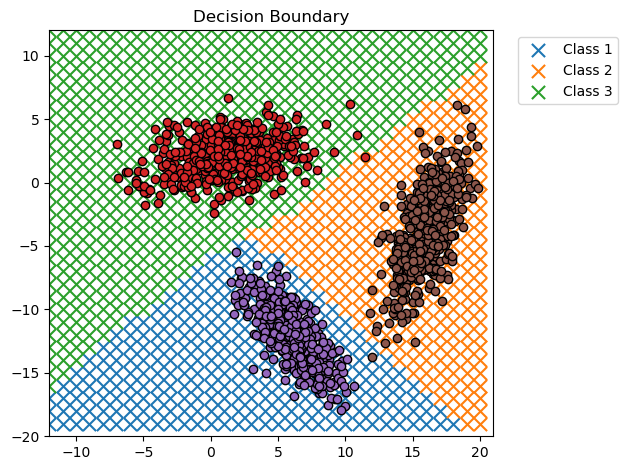

In [181]:
c1x, c2x, c3x = [], [], []
c1y, c2y, c3y = [], [], []

y = output

for i in range(len(all_points)):
        
    if y[i][0] == 1:
        c1x.append(all_points.iloc[i, 0])
        c1y.append(all_points.iloc[i, 1])
    elif y[i][1] == 1:
        c2x.append(all_points.iloc[i, 0])
        c2y.append(all_points.iloc[i, 1])
    else:
        c3x.append(all_points.iloc[i, 0])
        c3y.append(all_points.iloc[i, 1])
    

plt.scatter(c2x, c2y, marker='x', s=90)
plt.scatter(c3x, c3y, marker='x', s=90)
plt.scatter(c1x, c1y, marker='x', s=90)



plt.legend(['Class 2','Class 3', 'Class 1'])
plt.legend(['Class 1','Class 2', 'Class 3'], bbox_to_anchor=(1.04,1), loc="upper left")


plt.scatter(class1[0], class1[1], edgecolors='black')
plt.scatter(class2[0], class2[1], edgecolors='black')
plt.scatter(class3[0], class3[1], edgecolors='black')

plt.title("Decision Boundary")
plt.tight_layout()
plt.savefig("/Users/rajeshr/Desktop/fcnndecisionboundary.png")
plt.xlim(-12, 21)
plt.ylim(-20, 12)

plt.show()